In [93]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [94]:
data_train = pd.read_csv(r".\cs-training.csv")
data_test = pd.read_csv(r".\cs-test.csv")

In [95]:
data_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [96]:
data_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [97]:
data_train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [98]:
data_train.shape

(150000, 12)

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [100]:
data_train.drop(['Unnamed: 0'],axis=1,inplace=True)
data_test.drop(['Unnamed: 0','SeriousDlqin2yrs'],axis=1,inplace=True)

In [101]:
data_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [102]:
n_nan=np.isnan(data_train.values).sum(axis=0)
np.sum(n_nan!=0)
np.argsort(n_nan)[-np.sum(n_nan!=0):]
#data_train.isnull().sum()
#data_train.values.copy()


array([10,  5], dtype=int64)

In [103]:
data_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [104]:
#delete duplicates
data_train.drop_duplicates(inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [105]:
#reindex after deleting duplicates
data_train.index = range(data_train.shape[0])

In [106]:
# to fill missing values

In [107]:
#ratio of missing values
data_train.isnull().sum(axis=0)/data_train.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [108]:
#or we do the following to get the ratio of missing values
data_train.isnull().mean(axis=0)

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [109]:
data_train.loc[:,"NumberOfDependents"].describe()

count    145563.000000
mean          0.759863
std           1.116141
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [110]:
np.bincount(data_train.loc[:,"NumberOfDependents"].dropna().tolist())

array([86392, 26314, 19521,  9483,  2862,   746,   158,    51,    24,
           5,     5,     0,     0,     1,     0,     0,     0,     0,
           0,     0,     1], dtype=int64)

In [111]:
data_train.loc[:,"NumberOfDependents"].fillna(0,inplace=True)

In [112]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [113]:
noincome = data_train.loc[data_train.loc[:,"MonthlyIncome"].isnull(),:]

In [114]:
noincome.shape

(29221, 11)

(array([27567.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

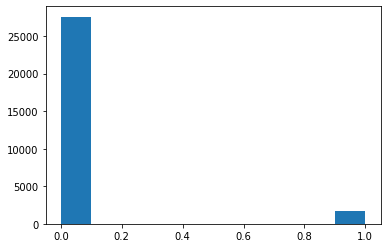

In [115]:
plt.hist(noincome.loc[:,"SeriousDlqin2yrs"].values)

In [116]:
noincome.loc[:,"SeriousDlqin2yrs"].tolist().count(1)/noincome.loc[:,"SeriousDlqin2yrs"].shape[0]

0.056603127887478184

In [117]:
data_train.loc[:,"SeriousDlqin2yrs"].tolist().count(1)/data_train.loc[:,"SeriousDlqin2yrs"].shape[0]

0.06699868131279663

In [118]:
#using random forest to fill missing values of income
def fill_missing_rf(x, y, continuous_var, to_fills=None, inplace=False):
    '''
    To fill missing values using random forest regressor or classifier
    
    need libs:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.impute import SimpleImputer
    
    input:
    x: (numpy.ndarray) feature matrix
    y: (numpy.ndarray, 2d array) target 
    to_fills: (integer list) a list of columns to be filled 
    continuous_var: (boolian list, same size of n_columns of x) True if a feature(column) is a continuous variable;
                    False if discret(categrical) variable 
    inplace: (Bool) False by default. if True, we fill the missing values in original x, 
             and don't return a new feature matrix
    
    return:
    None: if inplace=False
    x_reg: (numpy.ndarray) if inplace=True, we return a feature matrix with missing values filled
    '''
    n_columns = x.shape[1]
    
    # if inplace == True, generate a new feature matrix
    if inplace:
        x_reg = x
    else:
        x_reg = x.copy()
    
    # increasingly sort the columns(features) according to the number of missing values
    if to_fills == None:
        n_nan = np.isnan(x_reg).sum(axis=0)
        sortindex = np.argsort(n_nan)[-np.sum(n_nan!=0):]
    else:
        n_nan = np.isnan(x_reg[:,to_fills]).sum(axis=0)
        sortindex = np.argsort(n_nan)[-np.sum(n_nan!=0):]
    
    for i in sortindex:
        tofillc = x_reg[:,i]
        df = np.concatenate((x_reg[:,np.arange(n_columns)!=i], y),axis=1)
        df_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df)

        ytrain = tofillc[~np.isnan(tofillc)]
        #ytest = tofillc[np.isnan(tofillc)]
        xtrain = df_mean[~np.isnan(tofillc),:]
        xtest = df_mean[np.isnan(tofillc),:]
        
        if continuous_var[i]: 
            rfr = RandomForestRegressor(n_estimators=100,n_jobs=-1)
            rfr.fit(xtrain,ytrain)
            ypredict = rfr.predict(xtest)
            x_reg[np.isnan(tofillc),i] = ypredict
        else:
            rfr = RandomForestClassifier(n_estimators=100,n_jobs=-1)
            rfr.fit(xtrain,ytrain)
            ypredict = rfr.predict(xtest)
            x_reg[np.isnan(tofillc),i] = ypredict
    
    if inplace:
        return None
    else:
        return x_reg

In [119]:
x = data_train.iloc[:,1:].values
y = data_train.iloc[:,0].values.reshape(-1,1)
np.isnan(x).sum(axis=0)

array([    0,     0,     0,     0, 29221,     0,     0,     0,     0,
           0])

In [120]:
#fig, axes= plt.subplots(2,5,figsize=[20,12])
#labels=data_train.columns[1:]
#for i in range(x.shape[1]):
#    ax = axes.ravel()[i] 
#    ax.boxplot(x[:,i])
#    ax.set_title(labels[i])
#plt.show()

In [121]:
continuous_var = np.arange(x.shape[1]).astype(float)
continuous_var[:] = True
continuous_var

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
fill_missing_rf(x, y, continuous_var, to_fills=None, inplace=True)

In [123]:
data_train = pd.DataFrame(np.concatenate((y,x),axis=1),columns=data_train.columns)

In [124]:
np.isnan(x).sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

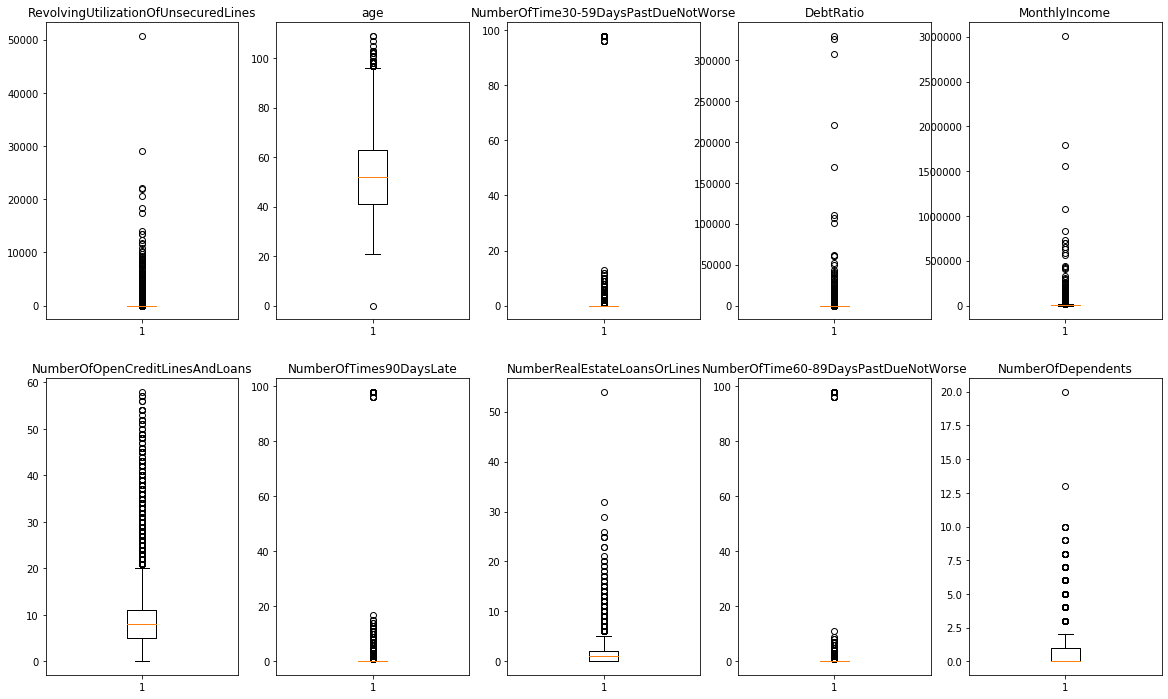

In [125]:
# anomalous data
fig, axes= plt.subplots(2,5,figsize=[20,12])
labels=data_train.columns[1:]
for i in range(x.shape[1]):
    ax = axes.ravel()[i] 
    ax.boxplot(x[:,i])
    ax.set_title(labels[i])
plt.show()

In [126]:
np.sum(x[:,0]>1)

3321

In [127]:
# delete the data out of the 3-sigma range
def delete_outliers(x_original):
    '''
    input: 
    x_original: (np.ndarray)
    
    output:
    x:(np.ndarray)
    '''
    x = x_original.copy()
    n_col =x.shape[1]
    for i in np.arange(n_col):
        #print(i)
        xi = x[:,i]
        mean = xi.mean()
        #print("mean:{}".format(mean))
        std = xi.std()
        #print("std:{}".format(std))
        ind_bool = (xi > mean + 3*std) | (xi < mean - 3*std)
        #print(ind_bool.shape)
        ind = np.arange(xi.shape[0])[ind_bool]
        x = np.delete(x,ind,axis=0)
        #print(x.shape)
    return x

In [128]:
x_trim = delete_outliers(x)

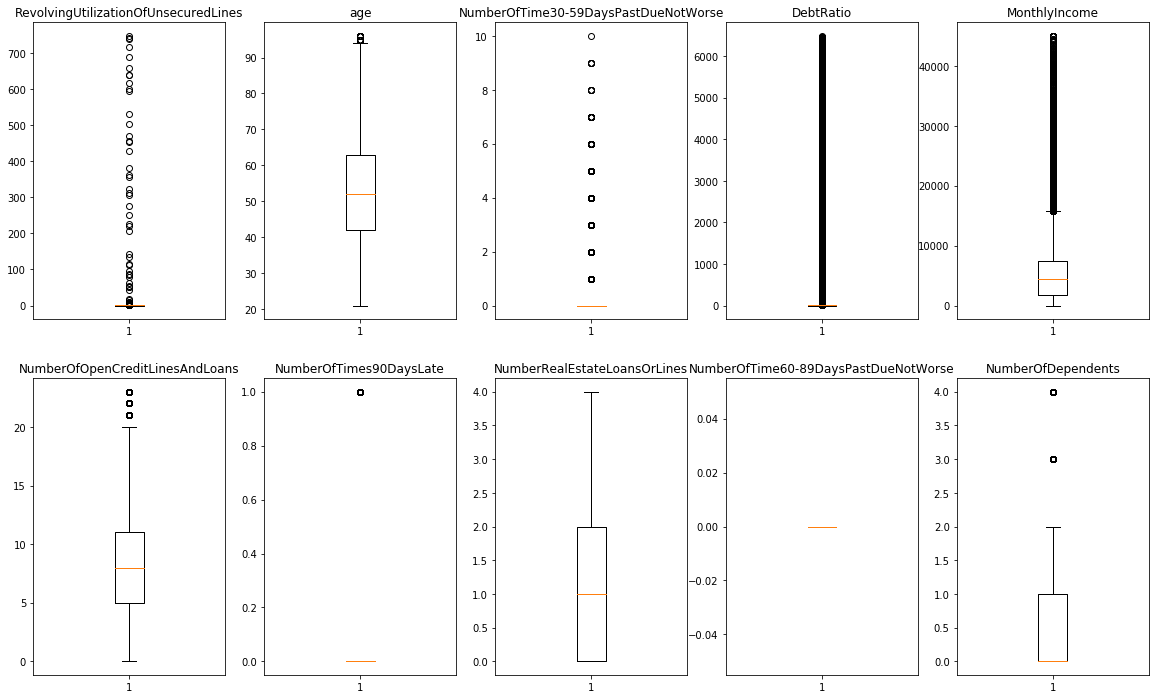

In [129]:
fig, axes= plt.subplots(2,5,figsize=[20,12])
labels=data_train.columns[1:]
for i in range(x_trim.shape[1]):
    ax = axes.ravel()[i] 
    ax.boxplot(x_trim[:,i])
    ax.set_title(labels[i])
plt.show()

In [130]:
data_train.describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,4985.100000,329664.0
MonthlyIncome,149391.0,5425.805615,13241.188115,0.0,0.0,0.180000,1800.000000,4417.000000,7416.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [131]:
# to delete anomalous data, e.g. age==0
(data_train.loc[:,'age']==0).sum()

1

In [132]:
data_train = data_train.loc[data_train.loc[:,'age']!=0,:]

In [133]:
data_train.shape

(149390, 11)

In [134]:
data_train.loc[data_train.loc[:,"NumberOfTimes90DaysLate"]>90,:].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [135]:
data_train.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0.0     141107
1.0       5232
2.0       1555
3.0        667
4.0        291
98.0       220
5.0        131
6.0         80
7.0         38
8.0         21
9.0         19
10.0         8
96.0         5
11.0         5
13.0         4
14.0         2
12.0         2
15.0         2
17.0         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [136]:
data_train  = data_train.loc[data_train.loc[:,'NumberOfTimes90DaysLate']<90,:]

In [137]:
data_train.index = range(data_train.shape[0])

In [138]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null float64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null float64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null float64
NumberOfTimes90DaysLate                 149165 non-null float64
NumberRealEstateLoansOrLines            149165 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null float64
NumberOfDependents                      149165 non-null float64
dtypes: float64(11)
memory usage: 12.5 MB


In [139]:
data_train.describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,1.094061,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,4989.360000,329664.0
MonthlyIncome,149165.0,5430.010892,13250.334247,0.0,0.0,0.170000,1800.000000,4431.000000,7417.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,24.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,11.0


In [140]:
#to explore the skewness
#over sampling
y = data_train.iloc[:,0]
y.value_counts()/(y.value_counts().sum())

0.0    0.933812
1.0    0.066188
Name: SeriousDlqin2yrs, dtype: float64

In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
sm = SMOTE(random_state=42)
x =  data_train.iloc[:,1:]
x, y = sm.fit_sample(x,y)

In [143]:
y.shape

(278584,)

In [144]:
y.value_counts()/(y.value_counts().sum())

0.0    0.5
1.0    0.5
Name: SeriousDlqin2yrs, dtype: float64

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train, x_vali, y_train, y_vali = train_test_split(x,y,test_size=0.3)

In [147]:
model_data = pd.concat([y_train,x_train],axis=1)
model_data.index = range(x_train.shape[0])
model_data.columns = data_train.columns

In [148]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.095781,47.000000,0.000000,0.089182,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.718218,54.181856,0.590928,0.061286,4400.000000,2.000000,0.590928,0.000000,0.000000,0.590928
2,0.0,0.003281,58.000000,0.000000,409.000000,0.110000,8.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.475698,59.914164,2.628590,0.126074,14473.056952,6.714262,0.657148,0.342852,1.314295,0.000000
4,1.0,0.904816,46.830251,0.830251,0.467891,11084.169749,14.490753,0.000000,2.000000,0.000000,2.169749


In [149]:
vali_data = pd.concat([y_vali,x_vali],axis=1)
vali_data.index = range(x_vali.shape[0])
vali_data.columns = data_train.columns

In [150]:
model_data.to_csv(r"E:\machine learning\logistic regression\model_data.csv")
vali_data.to_csv(r"E:\machine learning\logistic regression\vali_data.csv")

In [151]:
# We can use information value to bin the data of each featue (column)
# and select features.
# Information value:
# IV = \Sigma_i^{N} (good rate - bad rate) * WOE_i
# where N is the number of bins for the concerned feature
# and WOE_i = ln(good rate/bad rate) is called weight of evidence.

In [152]:
#    IV       the feature's contribution to prediction
# ---------------------------------------------------
#   <0.3      no contribution, could be deleted
# 0.03-0.09   small contribution
# 0.1 -0.29   medium contribution 
# 0.3 -0.49   strong contribution
#   >=0.5     extremely strong contribution, but may not be useful for prediction

In [153]:
# We expect strong similarity of data in the same bin while strong differences 
# different bins for a good binning of data. 

In [154]:
# to bin the data of "age", pd.qcut()
model_data["qcut"], bin_edges = pd.qcut(model_data["age"]
                                       ,retbins=True
                                       ,q=20)

In [155]:
model_data["qcut"]

0           (45.0, 47.0]
1           (54.0, 56.0]
2         (56.0, 58.712]
3         (58.712, 61.0]
4           (45.0, 47.0]
               ...      
195003    (34.0, 36.591]
195004    (20.999, 28.0]
195005      (52.0, 54.0]
195006    (20.999, 28.0]
195007      (45.0, 47.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.022] < (31.022, 34.0] < (34.0, 36.591] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 109.0]]

In [156]:
model_data["qcut"].value_counts()

(45.0, 47.0]        11220
(36.591, 39.0]      11096
(31.022, 34.0]      10799
(61.0, 64.0]        10712
(58.712, 61.0]      10640
(50.014, 52.0]      10596
(20.999, 28.0]      10232
(52.0, 54.0]        10068
(43.0, 45.0]        10043
(41.0, 43.0]         9785
(48.503, 50.014]     9750
(39.0, 41.0]         9410
(74.0, 109.0]        9310
(64.0, 68.0]         9275
(28.0, 31.022]       9269
(56.0, 58.712]       9242
(54.0, 56.0]         9096
(68.0, 74.0]         8815
(34.0, 36.591]       8702
(47.0, 48.503]       6948
Name: qcut, dtype: int64

In [157]:
bin_edges

array([ 21.        ,  28.        ,  31.02216848,  34.        ,
        36.59078203,  39.        ,  41.        ,  43.        ,
        45.        ,  47.        ,  48.50282259,  50.01441581,
        52.        ,  54.        ,  56.        ,  58.71205101,
        61.        ,  64.        ,  68.        ,  74.        ,
       109.        ])

In [158]:
count_y0 = model_data[model_data["SeriousDlqin2yrs"]==0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
count_y1 = model_data[model_data["SeriousDlqin2yrs"]==1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [159]:
# a list of (lower bound, upper bound, num of y=0, num of y=1)
num_bins = [*zip(bin_edges[:-1],bin_edges[1:],count_y0,count_y1)]
num_bins 

[(21.0, 28.0, 4249, 5983),
 (28.0, 31.02216847571402, 3514, 5755),
 (31.02216847571402, 34.0, 4014, 6785),
 (34.0, 36.5907820347273, 2860, 5842),
 (36.5907820347273, 39.0, 5080, 6016),
 (39.0, 41.0, 3944, 5466),
 (41.0, 43.0, 3995, 5790),
 (43.0, 45.0, 4373, 5670),
 (45.0, 47.0, 4765, 6455),
 (47.0, 48.502822593088844, 2461, 4487),
 (48.502822593088844, 50.014415809419745, 4929, 4821),
 (50.014415809419745, 52.0, 4584, 6012),
 (52.0, 54.0, 4732, 5336),
 (54.0, 56.0, 4597, 4499),
 (56.0, 58.71205101299213, 4531, 4711),
 (58.71205101299213, 61.0, 6661, 3979),
 (61.0, 64.0, 7018, 3694),
 (64.0, 68.0, 6627, 2648),
 (68.0, 74.0, 6770, 2045),
 (74.0, 109.0, 7752, 1558)]

In [160]:
# to make sure in all bins there are 0's and 1's
while (0 in num_bins[0][2:]):
    num_bins[0:2] = [(
        num_bins[0][0],
        num_bins[1][1],
        num_bins[0][2] + num_bins[1][2],
        num_bins[0][3] + num_bins[1][3]
    )]
i=1
while i<len(num_bins):
    if (0 in num_bins[i][2:]):
        num_bins[i-1:i+1] = [(
            num_bins[i-1][0],
            num_bins[i][1],
            num_bins[i-1][2] + num_bins[i][2],
            num_bins[i-1][3] + num_bins[i][3]
            )]
    else:
        i+=1

In [161]:
# To calculate WOE and IV
def get_woe(num_bins):
    columns = ["min", "max", "count_0", "count_1"]
    df = pd.DataFrame(num_bins, columns=columns)
    
    df["total"] = df["count_0"] + df["count_1"]
    df["percentage"] = df["total"]/df["total"].sum()
    df["bad_rate"] = df["count_0"]/df["total"]
    df["good%"] = df["count_0"]/df["count_0"].sum()
    df["bad%"] = df["count_1"]/df["count_1"].sum()
    df["woe"] = np.log(df["good%"]/df["bad%"])
    return df

def get_iv(bins_df):
    rate = bins_df["good%"] - bins_df["bad%"]
    iv = np.sum(rate * bins_df["woe"])
    return iv

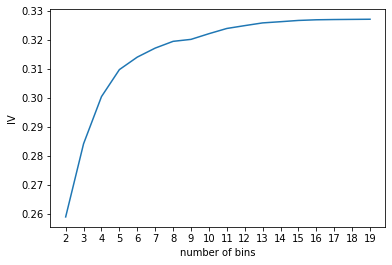

In [162]:
# chi squared test to combine bins



num_bins_ = num_bins.copy()
IV = []
binNum = []

N = 2
while len(num_bins_) > N:
    pvs = []
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 return the chi2 value, 1 return p-value
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)

    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                     num_bins_[i][0],
                     num_bins_[i+1][1],
                     num_bins_[i][2] + num_bins_[i+1][2],
                     num_bins_[i][3] + num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    binNum.append(len(num_bins_))
    IV.append(get_iv(bins_df))

plt.figure()
plt.plot(binNum, IV)
plt.xticks(binNum)
plt.xlabel("number of bins")
plt.ylabel("IV")
plt.show()

In [163]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            # 0 return the chi2 value, 1 return p-value
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                     num_bins_[i][0],
                     num_bins_[i+1][1],
                     num_bins_[i][2] + num_bins_[i+1][2],
                     num_bins_[i][3] + num_bins_[i+1][3])]
    return num_bins_

In [164]:
afterbins = get_bin(num_bins,6)

In [165]:
afterbins

[(21.0, 36.5907820347273, 14637, 24365),
 (36.5907820347273, 48.502822593088844, 24618, 33884),
 (48.502822593088844, 58.71205101299213, 23373, 25379),
 (58.71205101299213, 64.0, 13679, 7673),
 (64.0, 74.0, 13397, 4693),
 (74.0, 109.0, 7752, 1558)]

In [166]:
bins_df = get_woe(afterbins)

In [167]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.000000,36.590782,14637,24365,39002,0.200002,0.375288,0.150191,0.249764,-0.508611
1,36.590782,48.502823,24618,33884,58502,0.299998,0.420806,0.252606,0.347343,-0.318480
2,48.502823,58.712051,23373,25379,48752,0.250000,0.479426,0.239831,0.260159,-0.081356
3,58.712051,64.000000,13679,7673,21352,0.109493,0.640643,0.140361,0.078655,0.579139
4,64.000000,74.000000,13397,4693,18090,0.092765,0.740575,0.137467,0.048108,1.049943
5,74.000000,109.000000,7752,1558,9310,0.047742,0.832653,0.079544,0.015971,1.605533


In [168]:
def graphForBestBin(DF, X, Y, n=5, q=20, graph=True):
    '''
    To find the best number of bins, based on chi2 test and IV
    
    input:
    DF: DataFrame to input
    X: features needed to be binned
    Y: target feature
    n: the number of bins to attain
    q: the initial number of bins
    graph: whether to plot a graph
    '''
    DF = DF[[X,Y]].copy()
    
    DF["qcut"], bins = pd.qcut(DF[X], retbins=True, q=q, duplicates="drop")
    count_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    count_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],count_y0,count_y1)]
    
    while (0 in num_bins[0][2:]):
        num_bins[0:2] = [(
                        num_bins[0][0],
                        num_bins[1][1],
                        num_bins[0][2] + num_bins[1][2],
                        num_bins[0][3] + num_bins[1][3]
                        )]
    i=0
    while i<len(num_bins):
        if (0 in num_bins[i][2:]):
            num_bins[i-1:i+1] = [(
                               num_bins[i-1][0],
                               num_bins[i][1],
                               num_bins[i-1][2] + num_bins[i][2],
                               num_bins[i-1][3] + num_bins[i][3]
                               )]
        else:
            i+=1
    
    def get_woe(num_bins):
        columns = ["min", "max", "count_0", "count_1"]
        df = pd.DataFrame(num_bins, columns=columns)
    
        df["total"] = df["count_0"] + df["count_1"]
        df["percentage"] = df["total"]/df["total"].sum()
        df["bad_rate"] = df["count_0"]/df["total"]
        df["good%"] = df["count_0"]/df["count_0"].sum()
        df["bad%"] = df["count_1"]/df["count_1"].sum()
        df["woe"] = np.log(df["good%"]/df["bad%"])
        return df

    def get_iv(bins_df):
        rate = bins_df["good%"] - bins_df["bad%"]
        iv = np.sum(rate * bins_df["woe"])
        return iv
    
    IV = []
    binNum = []

    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            # 0 return the chi2 value, 1 return p-value
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                     num_bins[i][0],
                     num_bins[i+1][1],
                     num_bins[i][2] + num_bins[i+1][2],
                     num_bins[i][3] + num_bins[i+1][3])]
    
        bins_df = get_woe(num_bins)
        binNum.append(len(num_bins))
        IV.append(get_iv(bins_df))
    
    if graph:
        plt.figure()
        plt.plot(binNum, IV)
        plt.xticks(binNum)
        plt.xlabel("number of bins")
        plt.ylabel("IV")
        plt.title(X)
        plt.show()
        
    return bins_df

In [169]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

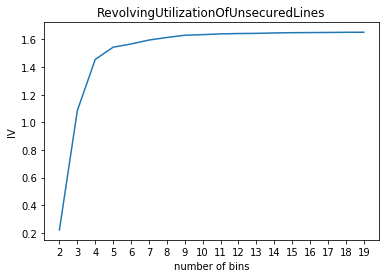

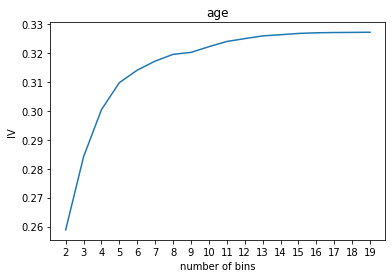

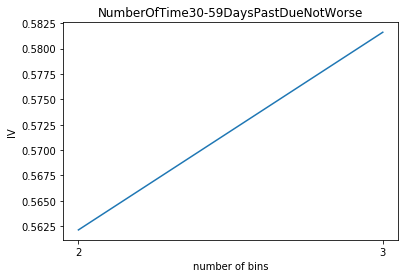

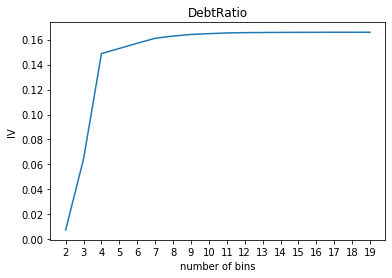

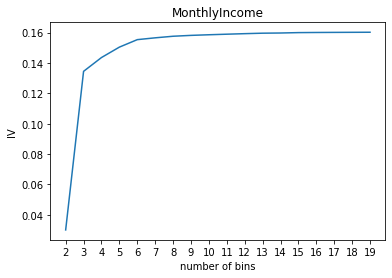

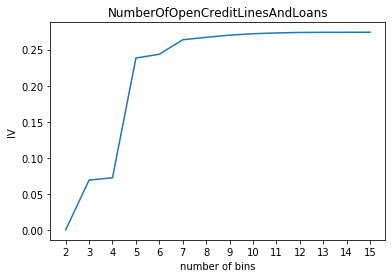

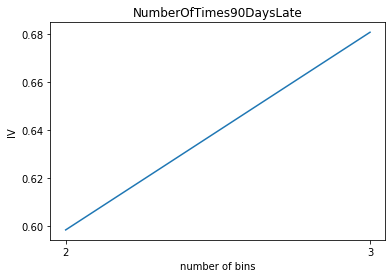

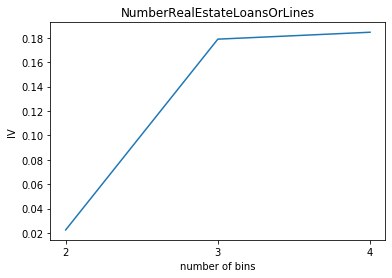

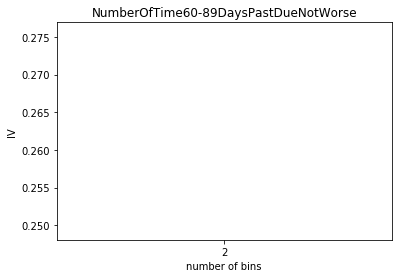

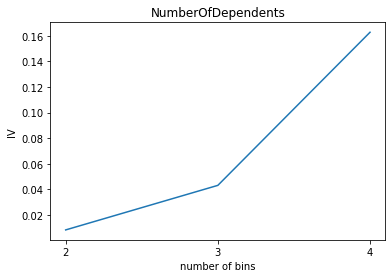

In [170]:
for i in model_data.columns[1:-1]:
    graphForBestBin(model_data,i,'SeriousDlqin2yrs',n=2,q=20,graph=True)

In [171]:
auto_col_bins = {'RevolvingUtilizationOfUnsecuredLines':5,
                 'age':6,
                 'DebtRatio':4,
                 'MonthlyIncome':5,
                 'NumberOfOpenCreditLinesAndLoans':5,
                }

hand_bins = {'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13],
             'NumberOfTimes90DaysLate':[0,1,2,17],
             'NumberRealEstateLoansOrLines':[0,1,2,4,54], 
             'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8],
             'NumberOfDependents':[0,1,2,3],
            }
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [172]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [173]:
bins_of_col={}

for col in auto_col_bins:
    bins_df = graphForBestBin(model_data, col
                             ,'SeriousDlqin2yrs'
                             ,n=auto_col_bins[col]
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    bins_list[0] = -np.inf
    bins_list[-1] = np.inf
    bins_of_col[col] = bins_list

bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.06025780000000001,
  0.1531262845000001,
  0.46477011721574296,
  0.9999998999999999,
  inf],
 'age': [-inf,
  36.5907820347273,
  48.502822593088844,
  58.71205101299213,
  64.0,
  74.0,
  inf],
 'DebtRatio': [-inf,
  0.017232778661931465,
  0.400658374,
  1.4505288814695498,
  inf],
 'MonthlyIncome': [-inf,
  0.1,
  7.384729629142394,
  5584.919523689137,
  7729.23194440286,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf,
  5.986556118002902,
  6.0,
  8.891582228528417,
  9.094212984329198,
  inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [174]:
data = model_data[['age','SeriousDlqin2yrs']].copy()

data['cut'] = pd.cut(data['age'],[-np.inf,
  36.631007277341425,
  48.492232080825936,
  58.75545684532448,
  64.0,
  74.0,
  np.inf])

data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack().columns

Float64Index([0.0, 1.0], dtype='float64', name='SeriousDlqin2yrs')

In [175]:
def get_WOE(df, col, y, bins):
    df = df[[col,y]].copy()
    df['cut'] = pd.cut(df[col],bins)
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = bins_df['woe'] = np.log((bins_df[0.0]/bins_df[0.0].sum()) / (bins_df[1.0]/bins_df[1.0].sum()))
    return woe

In [176]:
woe_all={}
for col in bins_of_col:
    woe_all[col] = get_WOE(model_data,col,'SeriousDlqin2yrs',bins_of_col[col])

In [177]:
woe_all

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0603]     2.429877
 (0.0603, 0.153]    1.309057
 (0.153, 0.465]     0.170152
 (0.465, 1.0]      -0.946032
 (1.0, inf]        -2.073600
 dtype: float64, 'age': cut
 (-inf, 36.591]     -0.508611
 (36.591, 48.503]   -0.318480
 (48.503, 58.712]   -0.081356
 (58.712, 64.0]      0.579139
 (64.0, 74.0]        1.049943
 (74.0, inf]         1.605533
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0172]     1.513294
 (0.0172, 0.401]    0.037751
 (0.401, 1.451]    -0.390952
 (1.451, inf]       0.174848
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]            1.355419
 (0.1, 7.385]           0.036590
 (7.385, 5584.92]      -0.294030
 (5584.92, 7729.232]    0.076437
 (7729.232, inf]        0.359316
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 5.987]    -0.278882
 (5.987, 6.0]      1.814619
 (6.0, 8.892]     -0.205465
 (8.892, 9.094]    1.185416
 (9.094, inf]      0.020003
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWors

In [178]:
pd.cut(model_data['age'],bins_of_col['age']).map(woe_all['age'])

0        -0.318480
1        -0.081356
2        -0.081356
3         0.579139
4        -0.318480
            ...   
195003   -0.508611
195004   -0.508611
195005   -0.081356
195006   -0.508611
195007   -0.318480
Name: age, Length: 195008, dtype: category
Categories (6, float64): [-0.508611 < -0.318480 < -0.081356 < 0.579139 < 1.049943 < 1.605533]

In [179]:
model_woe = pd.DataFrame(index=model_data.index)
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woe_all[col])

model_woe

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.309057,-0.318480,0.037751,-0.294030,-0.278882,1.091205,0.691682,0.208249,0.537173,0.626527
1,-0.946032,-0.081356,0.037751,-0.294030,-0.278882,-1.382604,-2.569503,0.208249,0.537173,-0.591887
2,2.429877,-0.081356,0.174848,0.036590,-0.205465,1.091205,0.691682,0.208249,0.537173,0.626527
3,-0.946032,0.579139,0.037751,0.359316,-0.205465,-2.283048,-2.569503,-0.001204,-2.957062,0.626527
4,-0.946032,-0.318480,-0.390952,0.359316,0.020003,-1.382604,0.691682,-0.118841,0.537173,-0.487382
...,...,...,...,...,...,...,...,...,...,...
195003,-0.946032,-0.508611,0.037751,0.076437,-0.278882,1.091205,0.691682,0.208249,0.537173,-0.591887
195004,-0.946032,-0.508611,0.037751,-0.294030,-0.278882,1.091205,-2.569503,0.208249,-2.487708,0.626527
195005,-0.946032,-0.081356,0.037751,-0.294030,-0.278882,-1.382604,0.691682,-0.001204,0.537173,-0.591887
195006,0.170152,-0.508611,-0.390952,-0.294030,-0.278882,1.091205,0.691682,-0.001204,0.537173,0.626527


In [180]:
model_woe['SeriousDlqin2yrs'] = model_data['SeriousDlqin2yrs']
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,1.309057,-0.318480,0.037751,-0.294030,-0.278882,1.091205,0.691682,0.208249,0.537173,0.626527,0.0
1,-0.946032,-0.081356,0.037751,-0.294030,-0.278882,-1.382604,-2.569503,0.208249,0.537173,-0.591887,1.0
2,2.429877,-0.081356,0.174848,0.036590,-0.205465,1.091205,0.691682,0.208249,0.537173,0.626527,0.0
3,-0.946032,0.579139,0.037751,0.359316,-0.205465,-2.283048,-2.569503,-0.001204,-2.957062,0.626527,1.0
4,-0.946032,-0.318480,-0.390952,0.359316,0.020003,-1.382604,0.691682,-0.118841,0.537173,-0.487382,1.0


In [181]:
# to process validation set the same way as model set
vali_woe = pd.DataFrame(index=vali_data.index)

for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woe_all[col])
vali_woe['SeriousDlqin2yrs'] = vali_data['SeriousDlqin2yrs']
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.946032,-0.508611,0.037751,0.076437,-0.278882,1.091205,0.691682,0.208249,0.537173,0.626527,0.0
1,1.309057,-0.081356,0.037751,-0.294030,-0.205465,-1.382604,0.691682,-0.001204,0.537173,-0.591887,1.0
2,-2.073600,-0.081356,-0.390952,-0.294030,-0.205465,-1.382604,-2.569503,-0.001204,-2.487708,-0.591887,0.0
3,2.429877,-0.318480,0.037751,-0.294030,-0.278882,1.091205,0.691682,0.208249,0.537173,-0.487382,0.0
4,-0.946032,-0.508611,0.037751,-0.294030,-0.278882,1.091205,-2.569503,0.208249,0.537173,0.626527,1.0


In [182]:
vali_x = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]

In [186]:
lr = LR().fit(x,y)
lr.score(vali_x,vali_y)

0.8656671771800517

In [ ]:
#one can adjust C or max_iter to achieve better score but not much

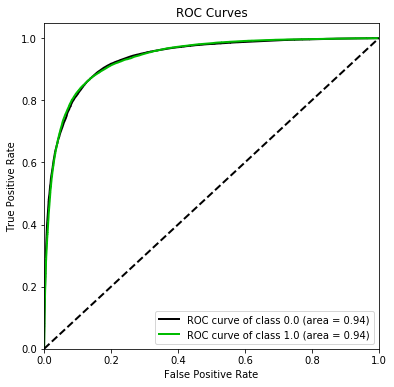

In [185]:
# ROC curve
import scikitplot as skplt

vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))

skplt.metrics.plot_roc(vali_y,vali_proba_df, 
                     plot_micro=False, figsize=(6,6),
                     plot_macro=False)

In [187]:
# credit score = A -  B * log(odds)

#odds - odds of failing to pay the balance 
# assume that credit score = 600 when odds = 1/60
# and credit score = 620 when odds = 1/30

B = 20/np.log(2)
A = 600 + B*np.log(1/60)

In [188]:
B, A

(28.85390081777927, 481.8621880878296)

In [189]:
base_score = A - B*lr.intercept_
base_score

array([481.36898624])

In [191]:
lr.intercept_

array([0.01709307])

In [190]:
woe_all

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0603]     2.429877
 (0.0603, 0.153]    1.309057
 (0.153, 0.465]     0.170152
 (0.465, 1.0]      -0.946032
 (1.0, inf]        -2.073600
 dtype: float64, 'age': cut
 (-inf, 36.591]     -0.508611
 (36.591, 48.503]   -0.318480
 (48.503, 58.712]   -0.081356
 (58.712, 64.0]      0.579139
 (64.0, 74.0]        1.049943
 (74.0, inf]         1.605533
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0172]     1.513294
 (0.0172, 0.401]    0.037751
 (0.401, 1.451]    -0.390952
 (1.451, inf]       0.174848
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]            1.355419
 (0.1, 7.385]           0.036590
 (7.385, 5584.92]      -0.294030
 (5584.92, 7729.232]    0.076437
 (7729.232, inf]        0.359316
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 5.987]    -0.278882
 (5.987, 6.0]      1.814619
 (6.0, 8.892]     -0.205465
 (8.892, 9.094]    1.185416
 (9.094, inf]      0.020003
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWors

In [195]:
score_age = -B*woe_all['age']*lr.coef_[0][1]
score_age

pandas.core.series.Series

In [198]:
file = r"E:\machine learning\logistic regression\credit score.csv"

with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(x.columns):
    score = woe_all[col]*(-B*lr.coef_[0][i])
    score.name = "score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")